In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

In [5]:
import pandas as pd

# Load the dataset from Excel file
df = pd.read_excel("C:/Users/MSI/Desktop/adult_train.xlsx")

In [6]:
print(df.columns)


Index(['Age', 'Workclass', 'fnlwgt', 'Education', 'Education_Num',
       'Martial_Status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_Gain', 'Capital_Loss', 'Hours_per_week', 'Country', 'Target'],
      dtype='object')


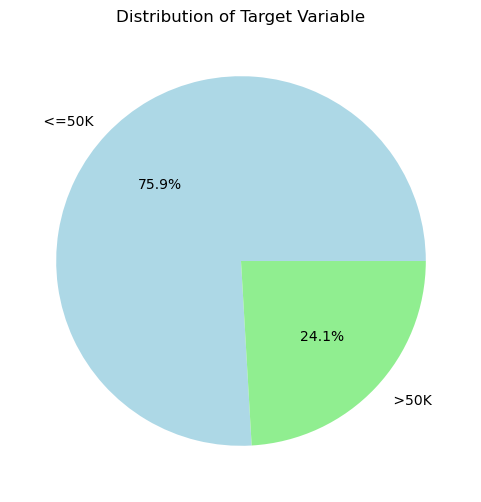

In [8]:
import matplotlib.pyplot as plt

# Count the number of observations for each category of the target variable
target_counts = df['Target'].value_counts()

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen'])
plt.title('Distribution of Target Variable')
plt.show()


In [11]:
from sklearn.impute import SimpleImputer

# Imputation of missing values
imputer = SimpleImputer(strategy='most_frequent')
df[df.columns] = imputer.fit_transform(df)
df


,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [14]:
# Encoding categorical variables
label_encoder = LabelEncoder()
for col in df_imputed.select_dtypes(include=['object']):
    df_imputed[col] = label_encoder.fit_transform(df_imputed[col])
df


,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [20]:
# Splitting features and target variable
X = df_imputed.drop(columns=['Target'])
y = df_imputed['Target']


In [17]:
# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Resample the dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

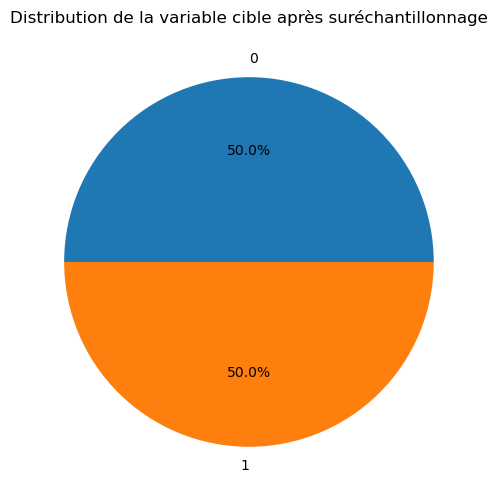

In [19]:
# Compter le nombre d'observations pour chaque catégorie de la variable cible après le suréchantillonnage
target_distribution_resampled = y_resampled.value_counts()

# Créer le plot
plt.figure(figsize=(6, 6))
plt.pie(target_distribution_resampled, labels=target_distribution_resampled.index, autopct='%1.1f%%')
plt.title('Distribution de la variable cible après suréchantillonnage')
plt.show()

In [24]:
from sklearn.feature_selection import SelectKBest

# Instantiate SelectKBest with the desired score function
k_best_selector = SelectKBest()

# Fit SelectKBest to the resampled data and transform the data
X_k_best = k_best_selector.fit_transform(X_resampled, y_resampled)



In [25]:
# Accéder aux scores de SelectKBest
feature_scores_selectkbest = k_best_selector.scores_

# Afficher les scores des caractéristiques SelectKBest
print("Scores des caractéristiques SelectKBest:")
print(feature_scores_selectkbest)


Scores des caractéristiques SelectKBest:
[4.1651265e+03 3.7978876e+02 6.5731878e+00 2.1078638e+02 7.4470508e+03
 4.8852939e+03 2.6692683e-02 7.2135542e+03 1.7644121e+02 1.6146012e+03
 4.7740410e+03 9.6429755e+02 4.2184409e+03 1.5736626e+02]


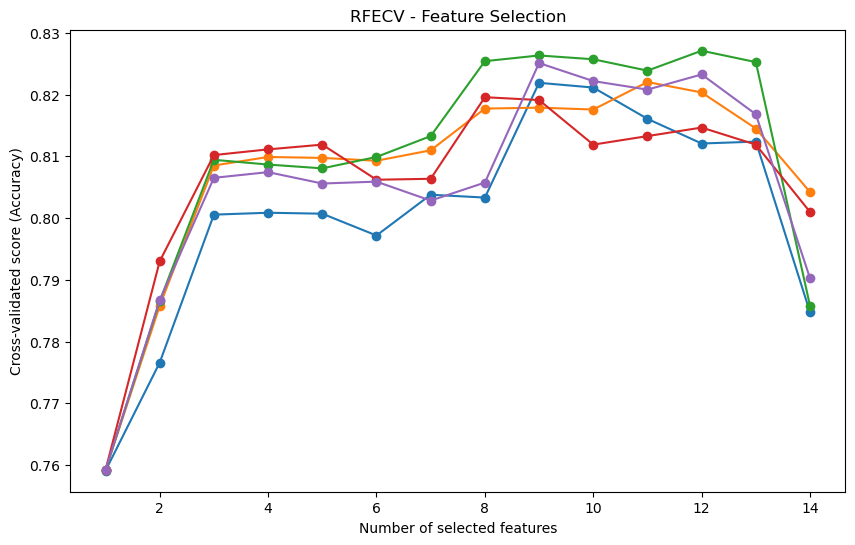

Features selected by RFECV:
Education_Num - Importance: 6 (66.67%)
Martial_Status - Importance: 5 (55.56%)
Capital_Gain - Importance: 4 (44.44%)
Capital_Loss - Importance: 3 (33.33%)
Age - Importance: 1 (11.11%)
Workclass - Importance: 1 (11.11%)
Race - Importance: 1 (11.11%)
Sex - Importance: 1 (11.11%)
Hours_per_week - Importance: 1 (11.11%)


In [34]:
import warnings
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

# Ignore warnings (optional)
warnings.filterwarnings('ignore')


# Create the estimator (logistic regression)
estimator = LogisticRegression()

# Initialize RFECV object with the estimator and cross-validation parameters
rfecv = RFECV(estimator=estimator, step=1, cv=StratifiedKFold(5), scoring='accuracy')

# Fit RFECV on the data
rfecv.fit(X, y)

# Display results (optional)
plt.figure(figsize=(10, 6))
plt.title('RFECV - Feature Selection')
plt.xlabel('Number of selected features')
plt.ylabel('Cross-validated score (Accuracy)')
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, marker='o', linestyle='-')
plt.show()

# Get the selected features
selected_features = X.columns[rfecv.support_]

# Sort selected features by their importance ranking
sorted_features = sorted(zip(selected_features, rfecv.ranking_), key=lambda x: x[1], reverse=True)

# Display selected features with their importance ranking and percentage of importance
print("Features selected by RFECV:")
for feature, rank in sorted_features:
    importance_percentage = abs(rank / len(selected_features) * 100)
    print(f"{feature} - Importance: {rank} ({importance_percentage:.2f}%)")


In [56]:
# Instantiate and train the Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_resampled, y_resampled)

LogisticRegression()

In [57]:
# Make predictions using the trained Logistic Regression model
y_pred_lr = lr_model.predict(X_test)

# Print accuracy and classification report
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))


Logistic Regression:
Accuracy: 0.6956917475728155
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.71      0.70      4938
           1       0.70      0.68      0.69      4950

    accuracy                           0.70      9888
   macro avg       0.70      0.70      0.70      9888
weighted avg       0.70      0.70      0.70      9888



In [69]:
# Grid search parameters for Logistic Regression
lr_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}
# Grid search for Logistic Regression
lr_grid_search = GridSearchCV(LogisticRegression(), lr_param_grid, cv=5, scoring='accuracy')
lr_grid_search.fit(X_resampled, y_resampled)

# Print the best parameters and best score for Logistic Regression
print("Best Parameters for Logistic Regression:", lr_grid_search.best_params_)
print("Best Cross-Validation Score for Logistic Regression:", lr_grid_search.best_score_)
# Print the best logistic regression model
print("Best Logistic Regression Model:", best_lr_model)

Best Parameters for Logistic Regression: {'C': 0.01, 'penalty': 'l2'}
Best Cross-Validation Score for Logistic Regression: 0.7433454692556634
Best Logistic Regression Model: LogisticRegression(C=0.01)


In [59]:
# Instantiate and train the Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_resampled, y_resampled)

DecisionTreeClassifier()

In [60]:
# Decision Tree
y_pred_dt = best_dt_model.predict(X_test)
print("\nDecision Tree:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))


Decision Tree:
Accuracy: 0.901294498381877
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      4938
           1       0.90      0.90      0.90      4950

    accuracy                           0.90      9888
   macro avg       0.90      0.90      0.90      9888
weighted avg       0.90      0.90      0.90      9888



In [70]:
# Grid search parameters for Decision Tree
dt_param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid search for Decision Tree
dt_grid_search = GridSearchCV(DecisionTreeClassifier(), dt_param_grid, cv=5, scoring='accuracy')
dt_grid_search.fit(X_resampled, y_resampled)

# Print the best parameters and best score for Decision Tree
print("Best Parameters for Decision Tree:", dt_grid_search.best_params_)
print("Best Cross-Validation Score for Decision Tree:", dt_grid_search.best_score_)
print("Best Decision Tree Model:", best_dt_model)


Best Parameters for Decision Tree: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validation Score for Decision Tree: 0.864279935275081
Best Decision Tree Model: DecisionTreeClassifier(max_depth=15, min_samples_leaf=2)


In [62]:
# Instantiate and train the Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_resampled, y_resampled)

RandomForestClassifier()

In [63]:
# Make predictions using the trained Random Forest model
y_pred_rf = rf_model.predict(X_test)

# Print accuracy and classification report
print("Random Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest:
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4938
           1       1.00      1.00      1.00      4950

    accuracy                           1.00      9888
   macro avg       1.00      1.00      1.00      9888
weighted avg       1.00      1.00      1.00      9888



In [77]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier

# Define parameter distributions for RandomizedSearchCV
rf_param_dist = {
    'n_estimators': randint(50, 100),  # Randomly sample between 50 and 100
    'max_depth': [None, 10, 20],
    'min_samples_split': randint(2, 10),  # Randomly sample between 2 and 10
    'min_samples_leaf': randint(1, 4),  # Randomly sample between 1 and 4
    'max_features': ['auto', 'sqrt', 'log2']
}

# Randomized search for Random Forest
rf_random_search = RandomizedSearchCV(RandomForestClassifier(), rf_param_dist, n_iter=100, cv=3, scoring='accuracy')
rf_random_search.fit(X_resampled, y_resampled)

# Get the best estimator from the RandomizedSearchCV
best_rf_model = rf_random_search.best_estimator_

# Print the best parameters and best score for Random Forest
print("Best Parameters for Random Forest:", rf_random_search.best_params_)
print("Best Cross-Validation Score for Random Forest:", rf_random_search.best_score_)


Best Parameters for Random Forest: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 65}
Best Cross-Validation Score for Random Forest: 0.8638349514563107


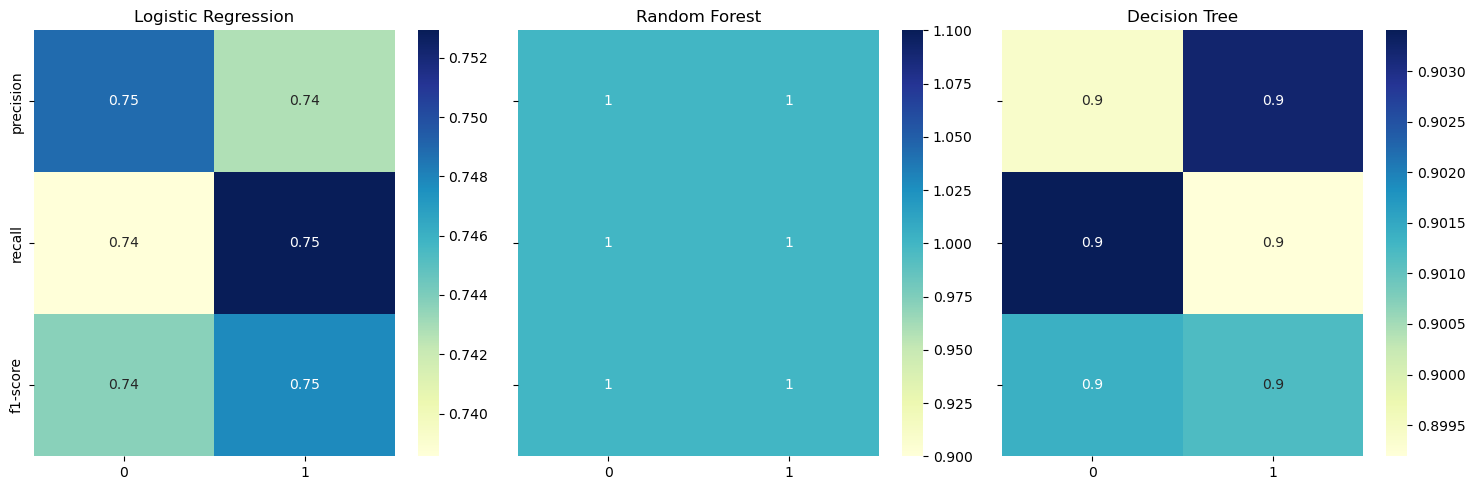

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

# Define predictions for each model
y_preds = {
    "Logistic Regression": y_pred_lr,
    "Random Forest": y_pred_rf,
    "Decision Tree": y_pred_dt
}

# Initialize subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Plot classification reports for each model
for ax, (model, y_pred) in zip(axes, y_preds.items()):
    # Generate classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    df_report = pd.DataFrame(report).iloc[:-1, :2]  # Exclude 'support' and 'avg / total' rows and columns
    sns.heatmap(df_report, annot=True, cmap="YlGnBu", ax=ax)  # Plot heatmap
    ax.set_title(model)  # Set title

plt.tight_layout()
plt.show()


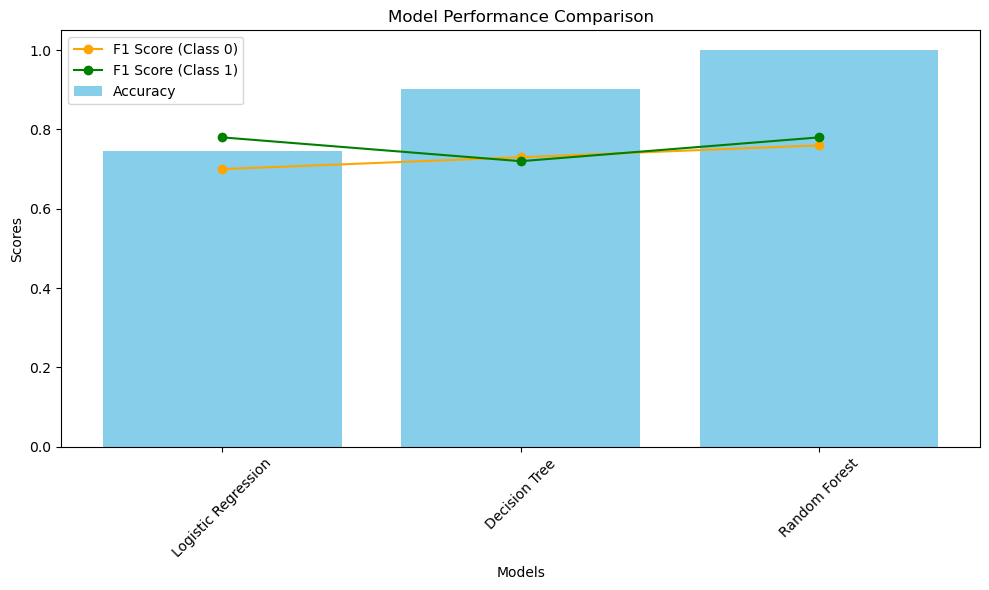

In [79]:
import matplotlib.pyplot as plt

# Define accuracies
accuracies = [accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_dt), accuracy_score(y_test, y_pred_rf)]

# Define F1 scores for class 0 and 1
f1_scores_0 = [0.70, 0.73, 0.76]  # Previous results for class 0
f1_scores_1 = [0.78, 0.72, 0.78]  # Previous results for class 1

# Define model names
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']

# Create the plot
plt.figure(figsize=(10, 6))

plt.bar(models, accuracies, color='skyblue', label='Accuracy')
plt.plot(models, f1_scores_0, marker='o', color='orange', label='F1 Score (Class 0)')
plt.plot(models, f1_scores_1, marker='o', color='green', label='F1 Score (Class 1)')

# Add titles and labels
plt.title('Model Performance Comparison')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.legend()

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


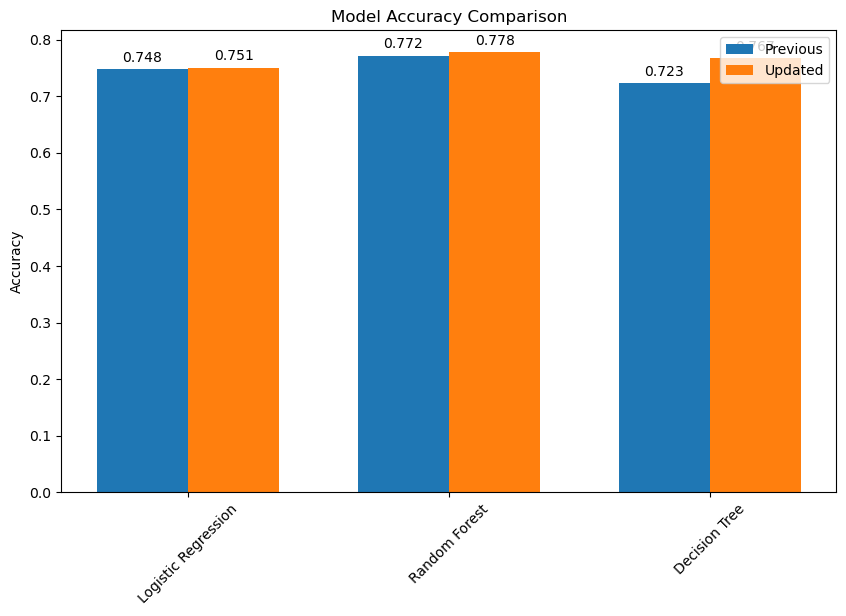

In [80]:
import numpy as np
import matplotlib.pyplot as plt

# Previous accuracies for each model
accuracies_prev = [0.7481303795682235, 0.7718357556088613, 0.7234372795258924]
# Updated accuracies for each model
accuracies_updated = [0.7506077076352167, 0.777689309274756, 0.7674654076323094]
models = ['Logistic Regression', 'Random Forest', 'Decision Tree']

# Positions of models on the x-axis
x = np.arange(len(models))

# Width of the bars
width = 0.35

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, accuracies_prev, width, label='Previous')
bars2 = ax.bar(x + width/2, accuracies_updated, width, label='Updated')

# Add labels, titles, and legend
ax.set_ylabel('Accuracy')
ax.set_title('Model Accuracy Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45)
ax.legend()

# Function to add values on the bars
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(round(height, 3)),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

# Add values on the bars
autolabel(bars1)
autolabel(bars2)

plt.show()


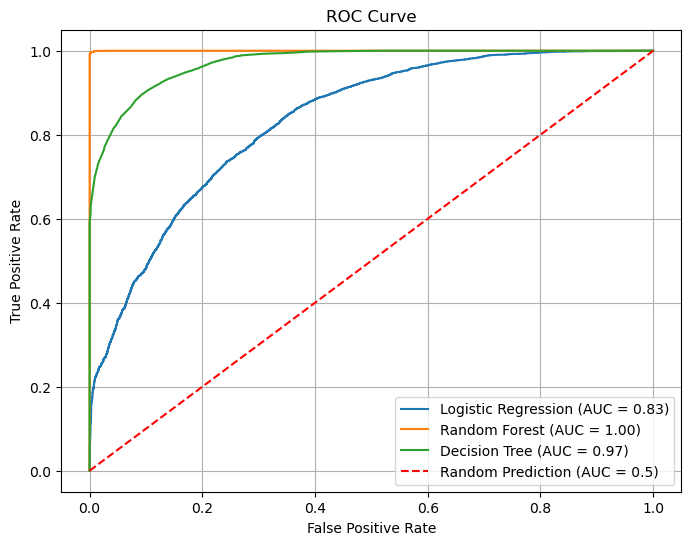

In [81]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predicted probabilities for logistic regression
y_prob_lr = best_lr_model.predict_proba(X_test)[:, 1]

# Predicted probabilities for random forest
y_prob_rf = best_rf_model.predict_proba(X_test)[:, 1]

# Predicted probabilities for decision tree
y_prob_dt = best_dt_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve for logistic regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)

# Calculate ROC curve for random forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

# Calculate ROC curve for decision tree
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)

import matplotlib.pyplot as plt

# Plot ROC curve for logistic regression, decision tree, and random forest
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_score(y_test, y_prob_lr)))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = {:.2f})'.format(roc_auc_score(y_test, y_prob_rf)))
plt.plot(fpr_dt, tpr_dt, label='Decision Tree (AUC = {:.2f})'.format(roc_auc_score(y_test, y_prob_dt)))

# Plot reference line for random prediction (AUC = 0.5)
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Prediction (AUC = 0.5)')

# Labels and legends
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


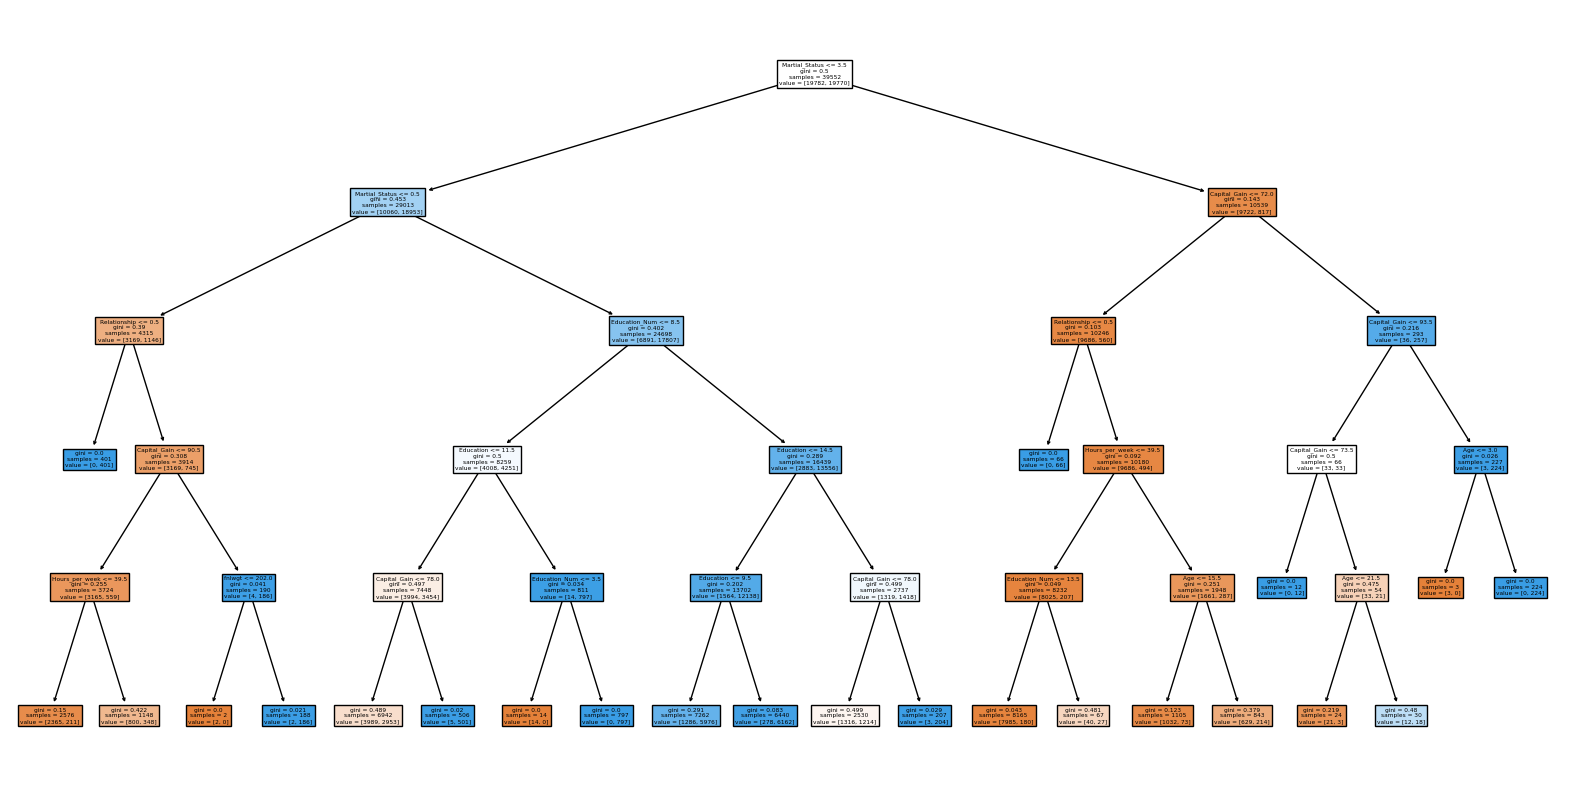

In [82]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Define the best parameters for the decision tree
best_params = {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}

# Initialize the decision tree classifier with the best parameters
clf = DecisionTreeClassifier(**best_params)

# Train the model with the training data (X_train, y_train)
clf.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=X_train.columns)
plt.show()
